<a href="https://colab.research.google.com/github/EduardoGSBP/data_science/blob/main/C%C3%B3pia_de_%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *São Francisco, Califórnia, Estados Unidos*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade São Francisco em Califórnia, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/san-francisco/2022-12-04/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* ...**id** - número de id gerado para identificar o imóvel
* ...**name** - nome da propriedade anunciada
* ...**host_id** - número de id do proprietário (anfitrião) da propriedade
* ...**host_name** - Nome do anfitrião
* ...**neighbourhood_group** - esta coluna não contém nenhum valor válido
* ...**neighbourhood** - nome do bairro
* ...**latitude** - coordenada da latitude da propriedade
* ...**longitude** - coordenada da longitude da propriedade
* ...**room_type** - informa o tipo de quarto que é oferecido
* ...**price** - preço para alugar o imóvel
* ...**minimum_nights** - quantidade mínima de noites para reservar
* ...**number_of_reviews** - número de reviews que a propriedade possui
* ...**last_review** - data do último review
* ...**reviews_per_month** - quantidade de reviews por mês
* ...**calculated_host_listings_count** - quantidade de imóveis do mesmo anfitrião
* ...
availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradadf.head()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,194,2,371,2022-11-18,2.28,1,161,57,City Registration Pending
1,487499,Mission District - Perfect Location,1682183,Daniel,NaN,Mission,37.75884,-122.42232,Entire home/apt,125,30,192,2022-10-31,1.51,1,356,5,NaN
2,144978,Prime Location - Small Basic Room,216682,Jay,NaN,Pacific Heights,37.79233,-122.42431,Private room,55,30,120,2020-03-31,0.86,9,54,0,NaN
3,490931,"Mission's ""La Lengua""",1269188,Maureen,NaN,Bernal Heights,37.74766,-122.42041,Private room,100,30,79,2015-08-01,0.75,1,358,0,NaN
4,147443,Best Views in all of San Francisco,709325,Mark,NaN,Diamond Heights,37.74633,-122.44591,Entire home/apt,167,30,112,2022-09-30,0.80,5,187,2,STR-0000672


In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\n {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 6789
Variáveis:
 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.397260
reviews_per_month                 0.180734
last_review                       0.180734
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

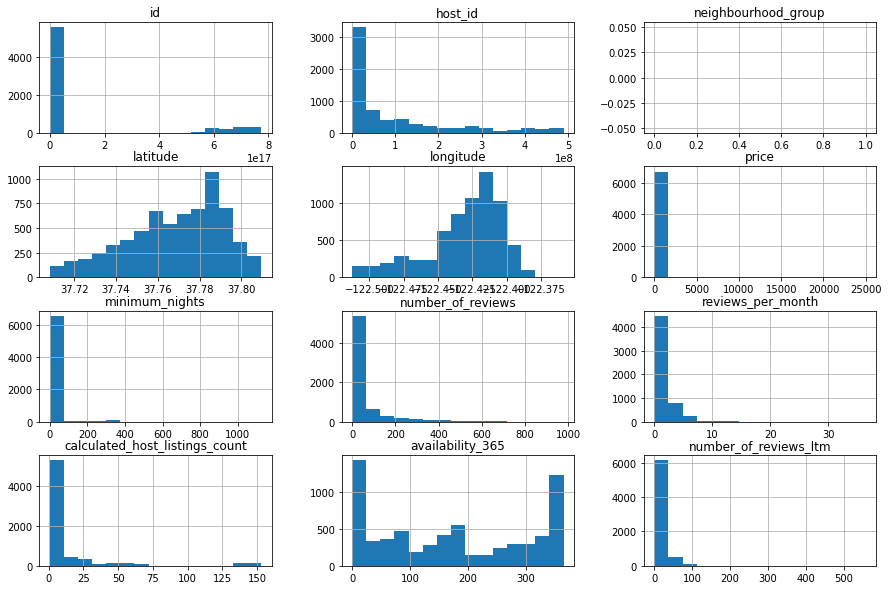

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

As políticas habitacionais das cidades e vilas podem restringir os aluguéis de curto prazo, para proteger a moradia dos residentes. Em São Francisco , os regulamentos de aluguel de curto prazo se aplicam a aluguéis de menos de 30 dias .

In [ ]:
# ver a média da coluna `price``
df.price.mean()

268.70908823096187

In [ ]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.789000e+03,6.789000e+03,0.0,6789.000000,6789.000000,6789.000000,6789.000000,6789.000000,5562.000000,6789.000000,6789.000000,6789.000000
mean,1.208976e+17,1.023542e+08,NaN,37.768296,-122.430186,268.709088,23.556930,48.659449,1.364036,13.667256,173.049345,10.637207
std,2.589342e+17,1.332468e+08,NaN,0.023061,0.027537,944.974389,53.748277,94.476154,1.991691,31.192535,133.141768,22.925957
min,9.580000e+02,1.169000e+03,NaN,37.708370,-122.512460,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.693015e+07,5.805679e+06,NaN,37.752970,-122.442880,99.000000,2.000000,1.000000,0.200000,1.000000,46.000000,0.000000
50%,3.564333e+07,3.601338e+07,NaN,37.772640,-122.423030,150.000000,6.000000,8.000000,0.580000,2.000000,164.000000,2.000000
75%,5.123414e+07,1.565042e+08,NaN,37.787430,-122.410390,250.000000,30.000000,49.000000,1.870000,9.000000,310.000000,10.000000
max,7.734981e+17,4.896232e+08,NaN,37.809540,-122.358480,25000.000000,1125.000000,977.000000,36.490000,153.000000,365.000000,558.000000


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.210324,-0.102368,-0.095740,-0.139145,-0.049348
minimum_nights,-0.210324,1.000000,-0.323712,-0.409653,0.091253,0.203929
number_of_reviews,-0.102368,-0.323712,1.000000,0.609881,-0.136000,-0.011611
reviews_per_month,-0.095740,-0.409653,0.609881,1.000000,-0.166882,0.007254
calculated_host_listings_count,-0.139145,0.091253,-0.136000,-0.166882,1.000000,0.002832
availability_365,-0.049348,0.203929,-0.011611,0.007254,0.002832,1.000000


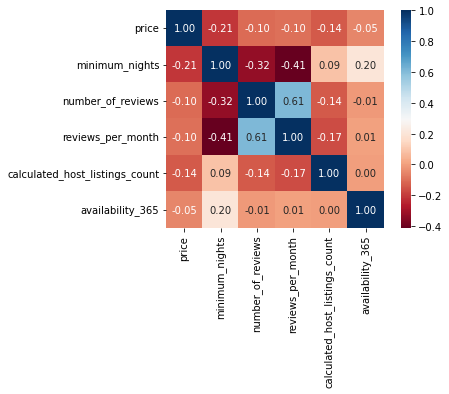

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3951
Private room       2097
Hotel room           66
Shared room          64
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.639527
Private room       0.339430
Hotel room         0.010683
Shared room        0.010359
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Russian Hill           342.014184
North Beach            337.641892
Diamond Heights        336.923077
Presidio               320.875000
Seacliff               292.600000
Pacific Heights        282.288732
Marina                 273.158470
Castro/Upper Market    264.207547
Twin Peaks             257.782609
Glen Park              250.377358
Name: price, dtype: float64

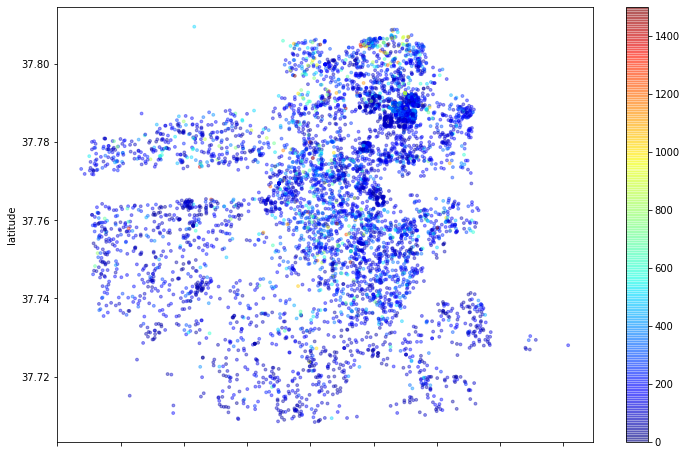

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()


23.55693032847253

In [ ]:
df.minimum_nights.describe()

count    6789.000000
mean       23.556930
std        53.748277
min         1.000000
25%         2.000000
50%         6.000000
75%        30.000000
max      1125.000000
Name: minimum_nights, dtype: float64

## Conclusões
